In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
!gdown https://www.kaggle.com/competitions/playground-series-s4e4/data?select=train.csv

Downloading...
From: https://www.kaggle.com/competitions/playground-series-s4e4/data?select=train.csv
To: /content/data?select=train.csv
5.79kB [00:00, 8.75MB/s]


In [150]:
train = pd.read_csv("/train.csv")


In [151]:
train.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [152]:
train.shape

(90615, 10)

In [93]:
train.dtypes

id                  int64
Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Whole weight.1    float64
Whole weight.2    float64
Shell weight      float64
Rings               int64
dtype: object

In [153]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              90615 non-null  int64  
 1   Sex             90615 non-null  object 
 2   Length          90615 non-null  float64
 3   Diameter        90615 non-null  float64
 4   Height          90615 non-null  float64
 5   Whole weight    90615 non-null  float64
 6   Whole weight.1  90615 non-null  float64
 7   Whole weight.2  90615 non-null  float64
 8   Shell weight    90615 non-null  float64
 9   Rings           90615 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 6.9+ MB


In [154]:
train.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
Rings             0
dtype: int64

In [128]:
train.describe()

,id,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
count,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000
mean,45307.000000,0.517098,0.401679,0.135464,0.789035,0.340778,0.169422,0.225898,9.696794
std,26158.441658,0.118217,0.098026,0.038008,0.457671,0.204428,0.100909,0.130203,3.176221
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,22653.500000,0.445000,0.345000,0.110000,0.419000,0.177500,0.086500,0.120000,8.000000
50%,45307.000000,0.545000,0.425000,0.140000,0.799500,0.330000,0.166000,0.225000,9.000000
75%,67960.500000,0.600000,0.470000,0.160000,1.067500,0.463000,0.232500,0.305000,11.000000
max,90614.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [155]:
train.loc[train['Height'] == 0, 'Height'] = np.nan

In [156]:
print(train.isna().sum())

id                0
Sex               0
Length            0
Diameter          0
Height            6
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
Rings             0
dtype: int64


In [157]:
train.shape

(90615, 10)

In [158]:
train.dropna(inplace=True)

In [132]:
df = train.copy(deep='True')
df = df.drop(columns='id',axis=1)


In [109]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [110]:
correlation_matrix = df.drop(columns=['Sex']).corr()
correlation_matrix

,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
Length,1.000000,0.989731,0.916281,0.931445,0.909604,0.913130,0.911147,0.623781
Diameter,0.989731,1.000000,0.919807,0.933844,0.908461,0.914664,0.917948,0.636829
Height,0.916281,0.919807,1.000000,0.902517,0.861945,0.886312,0.904366,0.665924
Whole weight,0.931445,0.933844,0.902517,1.000000,0.971247,0.974318,0.964262,0.617268
Whole weight.1,0.909604,0.908461,0.861945,0.971247,1.000000,0.949224,0.911858,0.515059
Whole weight.2,0.913130,0.914664,0.886312,0.974318,0.949224,1.000000,0.937127,0.588951
Shell weight,0.911147,0.917948,0.904366,0.964262,0.911858,0.937127,1.000000,0.694790
Rings,0.623781,0.636829,0.665924,0.617268,0.515059,0.588951,0.694790,1.000000


In [111]:
numeric_features = df.select_dtypes(include = ['int', 'float']).columns.to_list()
categoric_features = df.select_dtypes(include = ['object', 'category']).columns.to_list()

## Hist Plot

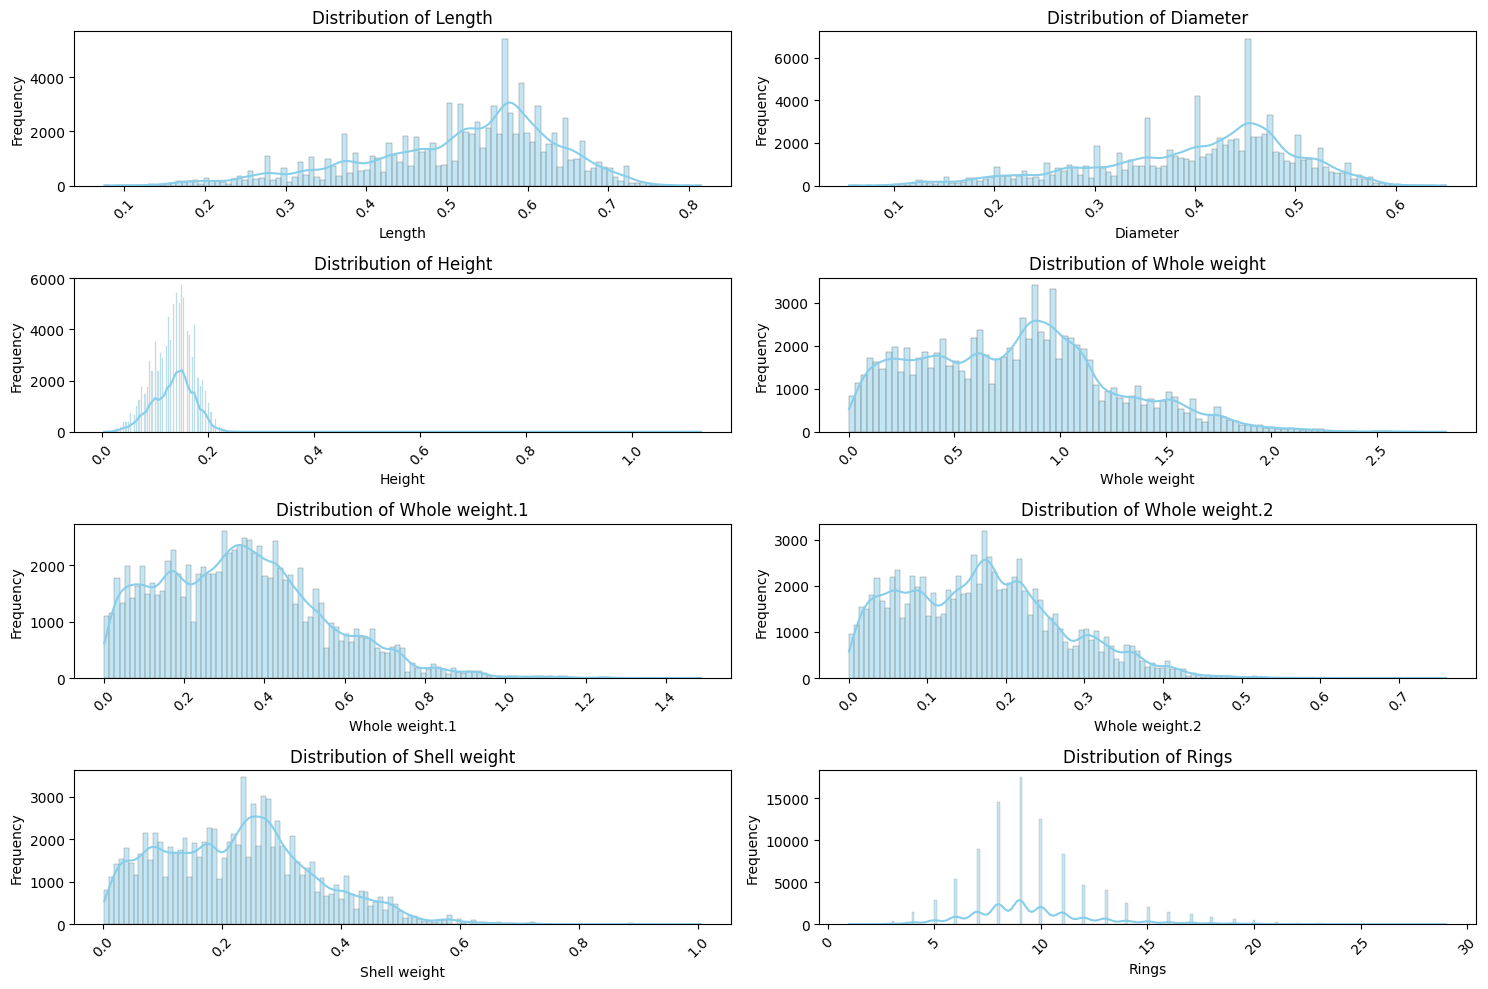

In [19]:
# Calculate the number of rows and columns for the grid
num_cols = 2
num_rows = (len(numeric_features) + num_cols - 1) // num_cols

# Create a grid of subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Flatten the axis array for easy iteration
axs = axs.flatten()

# Loop through each numeric feature and plot its histogram
for i, num_feat in enumerate(numeric_features):
    sns.histplot(df[num_feat], kde=True, color='skyblue', edgecolor="gray", ax=axs[i])
    axs[i].set_title(f"Distribution of {num_feat}")
    axs[i].set_xlabel(num_feat)
    axs[i].set_ylabel("Frequency")
    axs[i].tick_params(axis='x', rotation=45)

# Hide empty subplots
for j in range(len(numeric_features), len(axs)):
    fig.delaxes(axs[j])

# Adjust layout
plt.tight_layout()
plt.show()

## Pair Plot

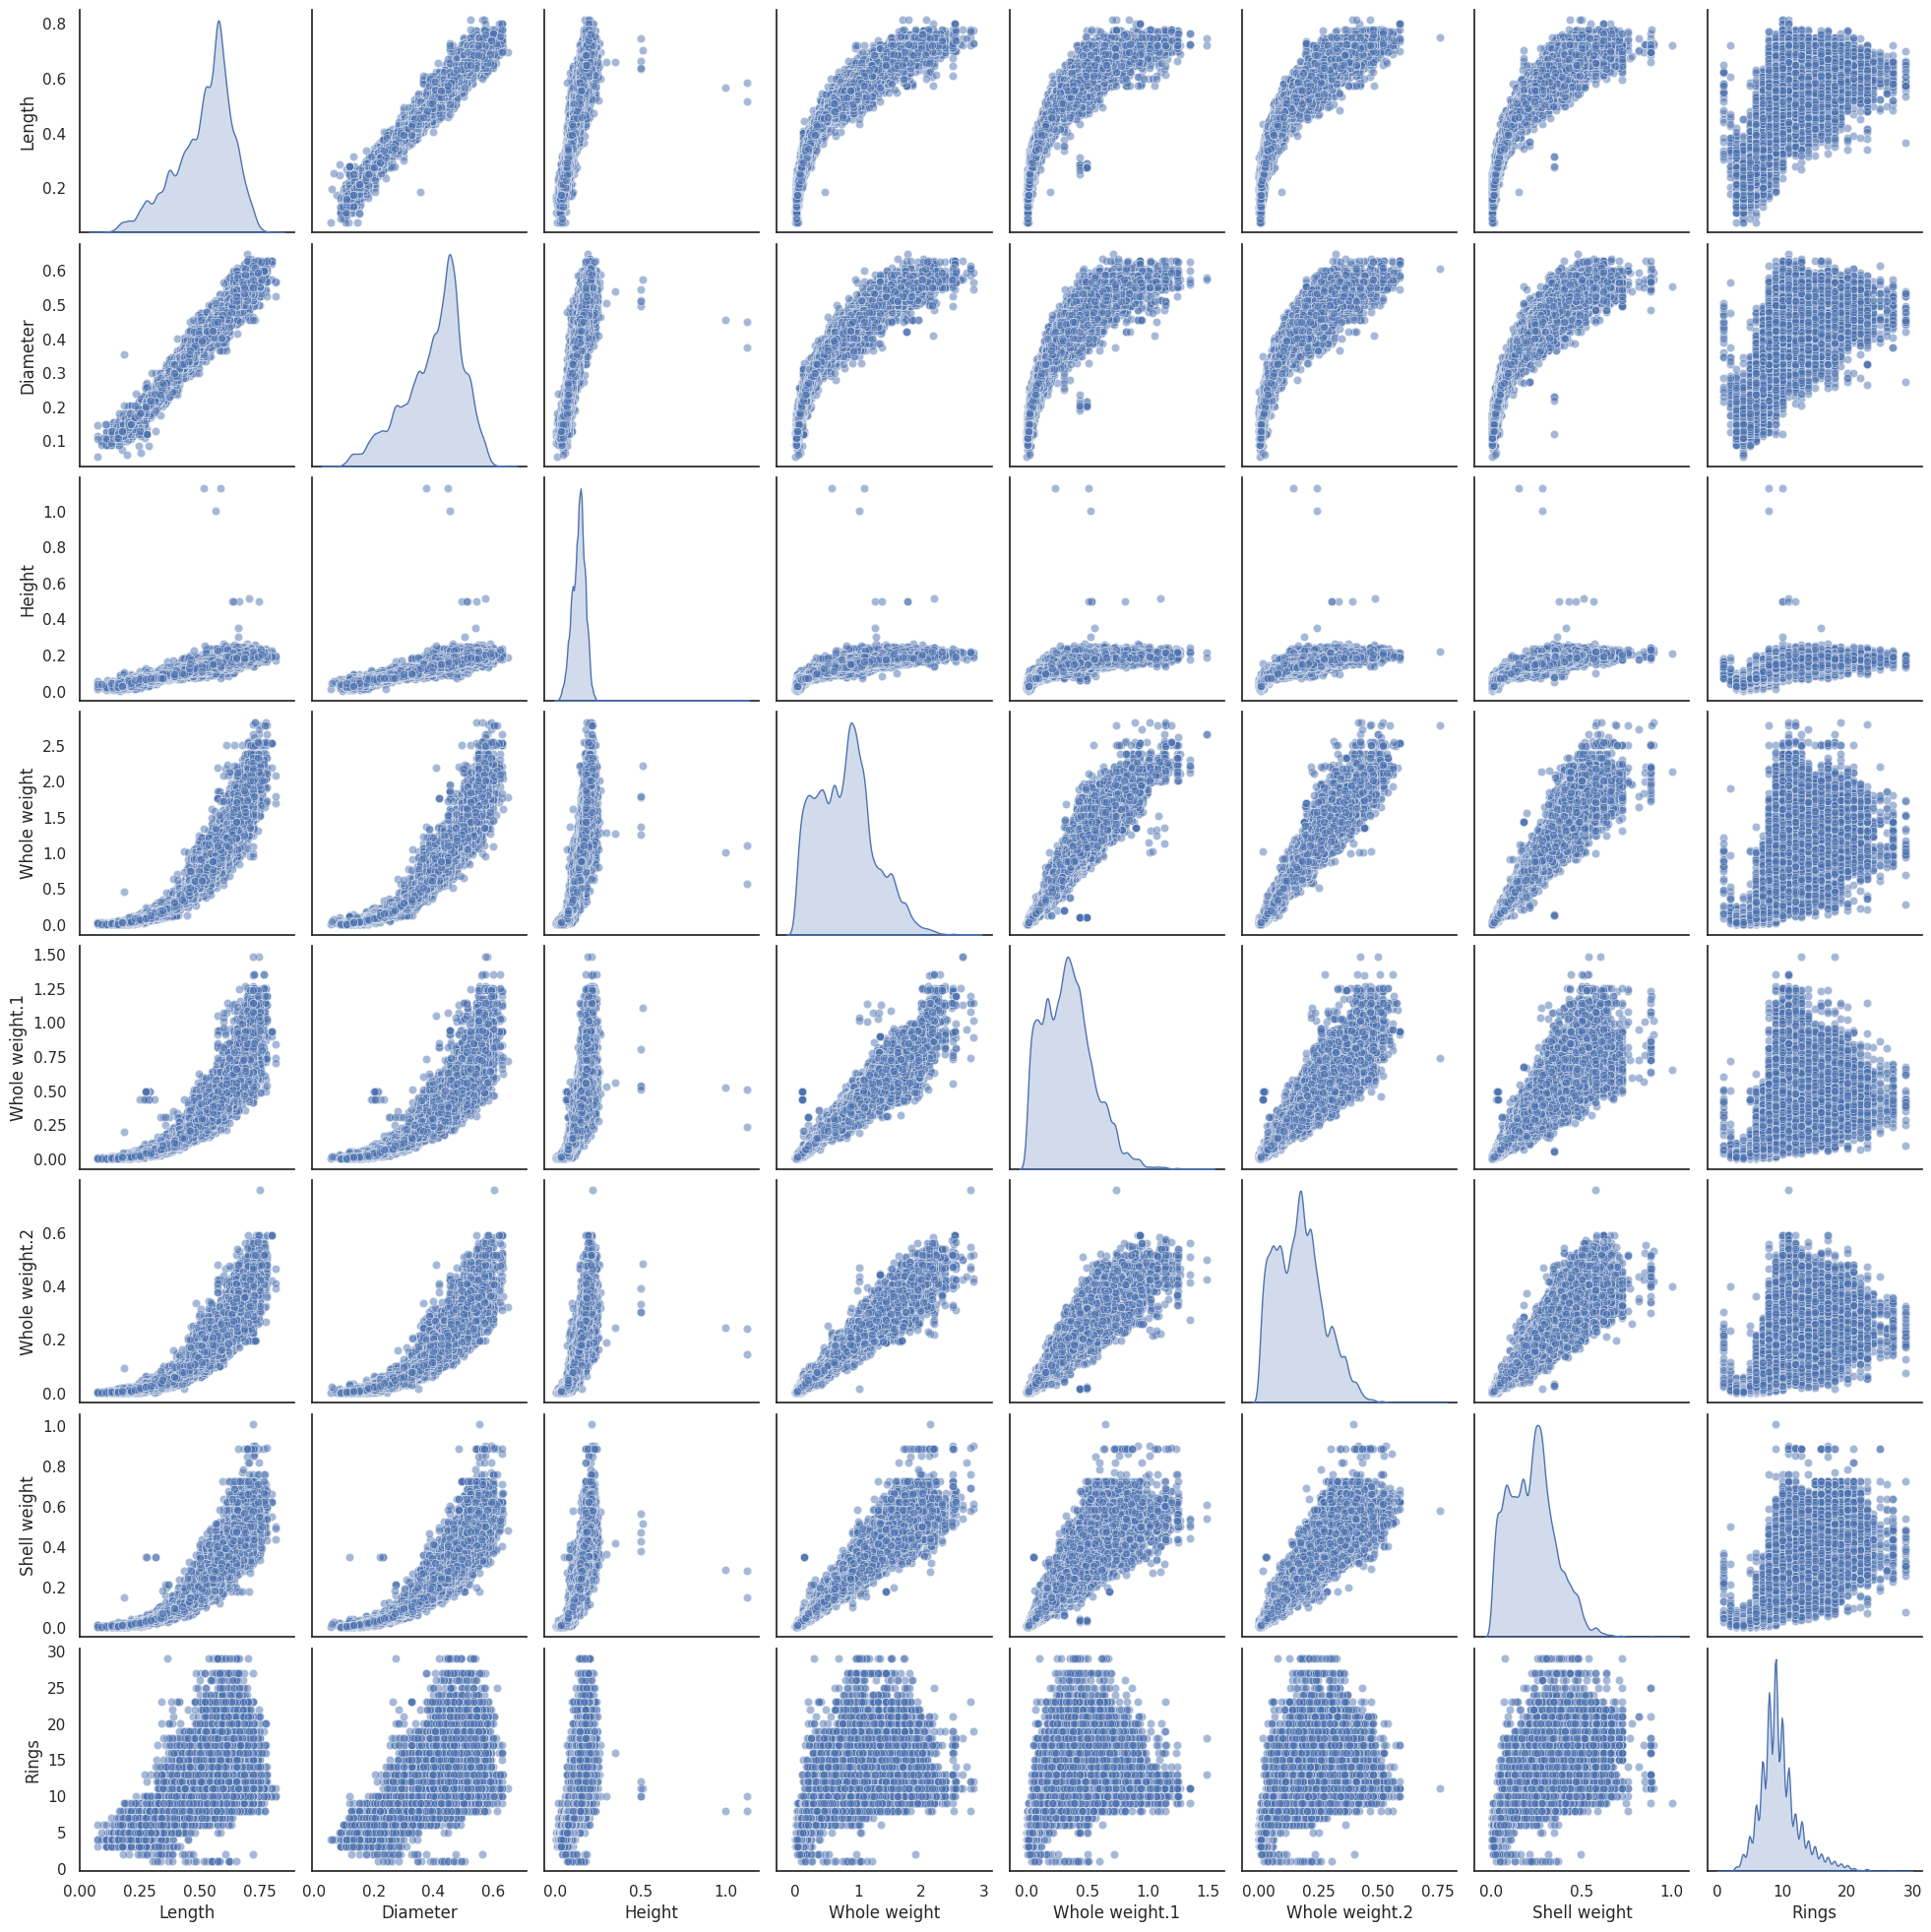

In [20]:
sns.set(style="white")
sns.pairplot(df, diag_kind="kde", markers="o", plot_kws={"alpha": 0.5})
plt.show()


## Q-Q Plot

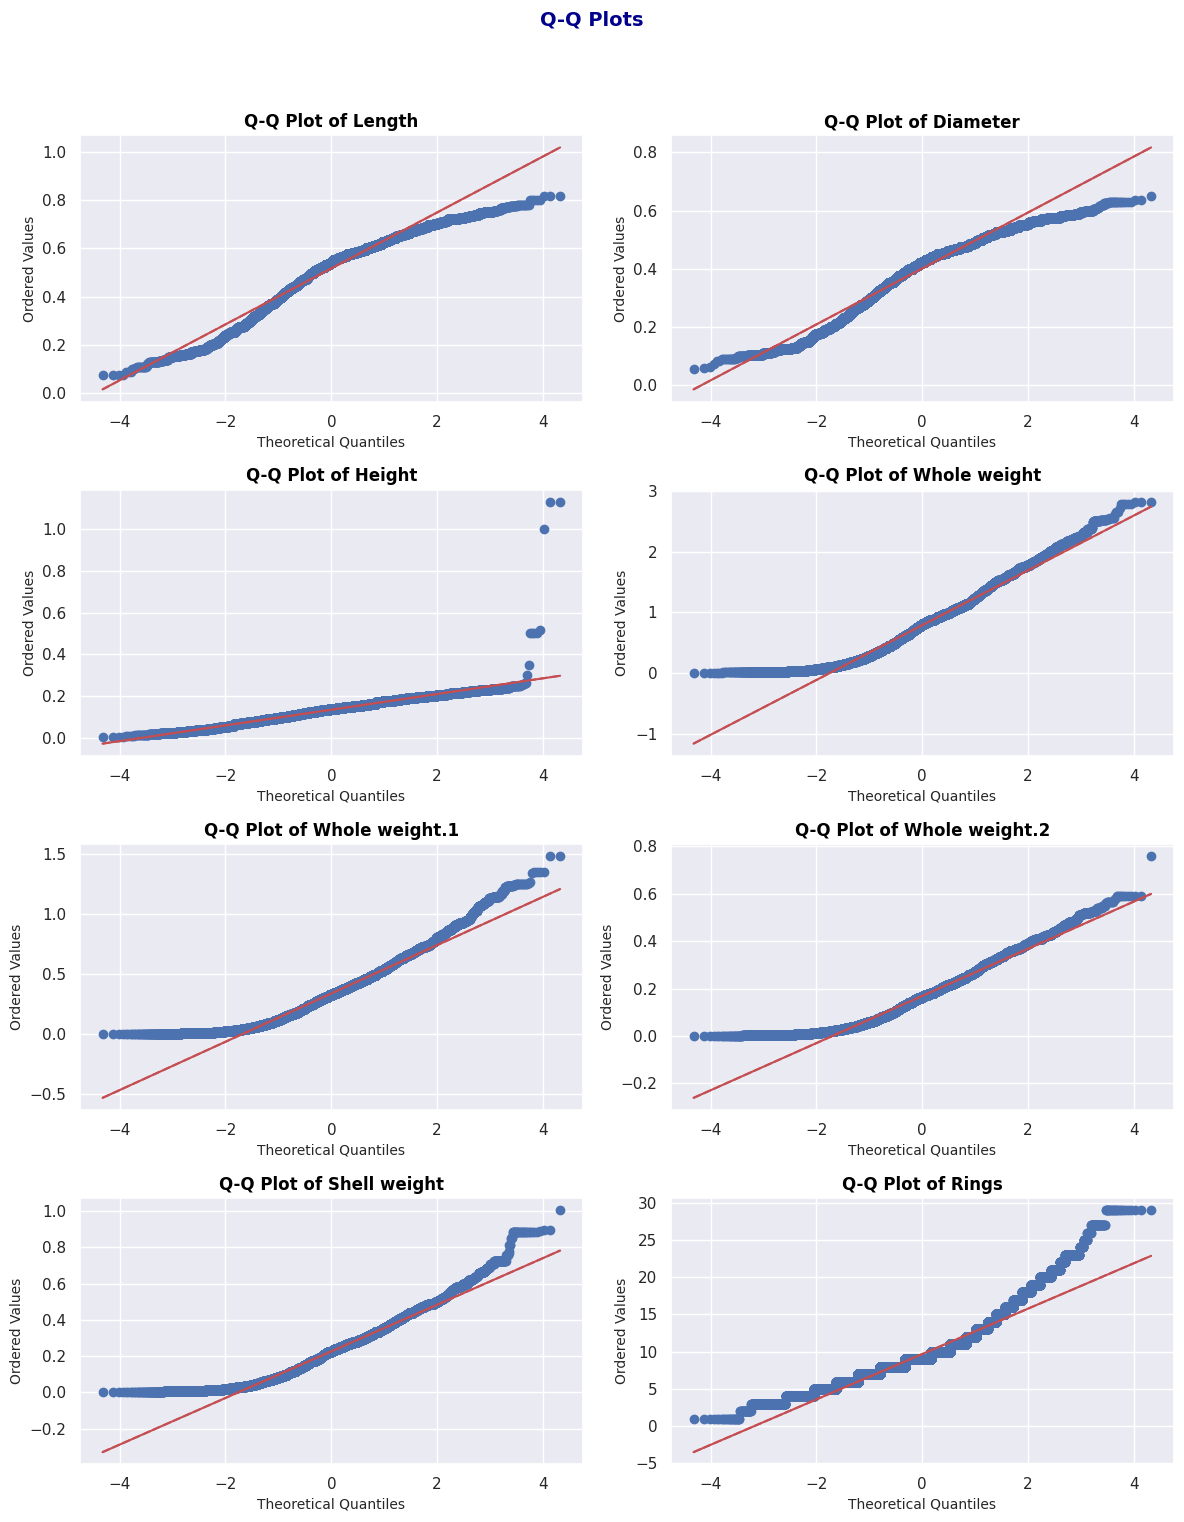

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Set seaborn style
sns.set_style(style="darkgrid")

# Define the number of rows and columns for subplots
num_rows = 4
num_cols = 2

# Create subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 16))

# Flatten the axis array for easier iteration
axs = axs.flat

# Loop through each numerical feature and create a Q-Q plot
for i, num_feat in enumerate(numeric_features):
    if i < num_rows * num_cols:
        # Generate Q-Q plot
        stats.probplot(df[num_feat], dist="norm", plot=axs[i])

        # Add reference line
        axs[i].plot(axs[i].get_lines()[1].get_xdata(), axs[i].get_lines()[1].get_ydata(), color='r', linestyle='--')

        # Set title and labels
        axs[i].set_title(f"Q-Q Plot of {num_feat}", fontsize=12, fontweight='bold', color="black")
        axs[i].set_xlabel("Theoretical Quantiles", fontsize=10)
        axs[i].set_ylabel("Ordered Values", fontsize=10)

# Set overall title and layout
fig.suptitle("Q-Q Plots", fontsize=14, fontweight="bold", color="darkblue")
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Model Training

In [159]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_squared_log_error




In [160]:
test = pd.read_csv('/test.csv')
test.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,90615,M,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
1,90616,M,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
2,90617,M,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405
3,90618,M,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350
4,90619,I,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050


In [161]:
test = pd.get_dummies(test, columns=['Sex'])

In [162]:
train = pd.get_dummies(train, columns=['Sex'])

In [163]:
dtypes = X_train.dtypes
for col in dtypes[dtypes == "object"].index:
    X_train[col] = X_train[col].astype("category")

In [164]:
test = test.drop(columns=['id'], axis=1)
train = train.drop(columns=['id'], axis=1)

y = train.Rings
X = train.drop(['Rings'], axis=1)

In [165]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=21)

In [166]:
xgb_params = {
    'verbosity': 0,
    "early_stopping_rounds":25,
    'n_estimators': 1500,
    'eval_metric': 'rmse',
    'random_state':1234,
    'max_depth': 8,
    'subsample': 0.79,
    'objective': 'reg:squarederror',
    'learning_rate': 0.013,
    'colsample_bytree': 0.56,
    "min_child_weight": 10,
}

xgb_model = XGBRegressor(**xgb_params)

In [167]:
train.dtypes

Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Whole weight.1    float64
Whole weight.2    float64
Shell weight      float64
Rings               int64
Sex_F                bool
Sex_I                bool
Sex_M                bool
dtype: object

In [168]:
xgb_model = XGBRegressor(n_estimators=1000, early_stopping_rounds=10, learning_rate=0.07, max_depth=7)

In [169]:
xgb_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=10,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.07, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## Predictions

In [170]:
pred = xgb_model.predict(X_val)


In [171]:
pred

array([ 9.334327,  9.696913, 11.374955, ...,  7.690644, 10.002254,
        8.149018], dtype=float32)

In [172]:
print("The RMSLE score is: ", mean_squared_log_error(pred, y_val)**0.5)

The RMSLE score is:  0.15052577452391086


In [173]:
predictions = xgb_model.predict(test)

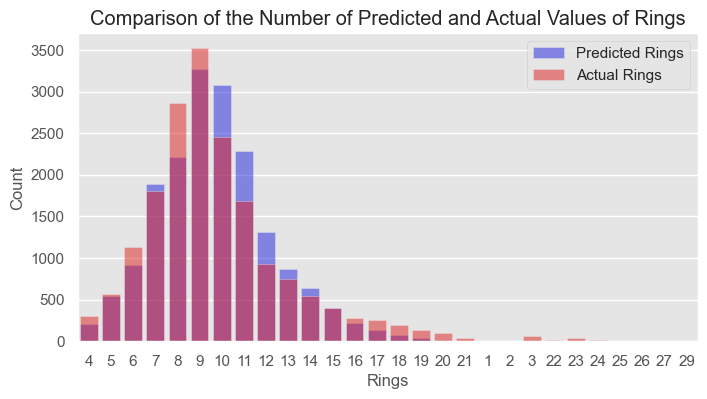

CPU times: total: 625 ms
Wall time: 1.93 s


In [ ]:
%%time

df_pred = pd.DataFrame({'Rings': pred.round().astype(int)})
df_vald = pd.DataFrame({'Rings': y_val})
plt.figure(figsize=(8, 4))
sns.countplot(x='Rings', data=df_pred, color='blue', alpha=0.5, label='Predicted Rings')
sns.countplot(x='Rings', data=df_vald, color='red', alpha=0.5, label='Actual Rings')
plt.title("Comparison of the Number of Predicted and Actual Values of Rings")
plt.xlabel('Rings')
plt.ylabel('Count')
plt.legend()
plt.show()

## Submission

In [179]:
submission = pd.read_csv('/content/sample_submission.csv')

submission['Rings'] = predictions
submission.to_csv('submission.csv', index=False)